In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
np.random.seed(42)

# Question 3

Part 1

In [2]:
def random_plot(noise, samples):
    x = 25*(np.random.rand(samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise*np.random.randn(samples, 1)
    plt.plot(x,y,'ro')
    plt.title("Random Plot")
    plt.show()
    X = x.reshape(samples,)
    Y = y.reshape(samples,)
    MSE = []
    for m in range(1, 9):
        p = np.poly1d( np.polyfit(X, Y, m) )
        for i in range(samples):
            e=0
            e += ((y[i]-p(x[i]))**2)/samples
        MSE.append(e)
    print(MSE)
    m = [1, 2, 3, 4, 5, 6, 7, 8]
    plt.plot(m, MSE)
    plt.title("MSE vs Degree")
    plt.show()
    return X, Y

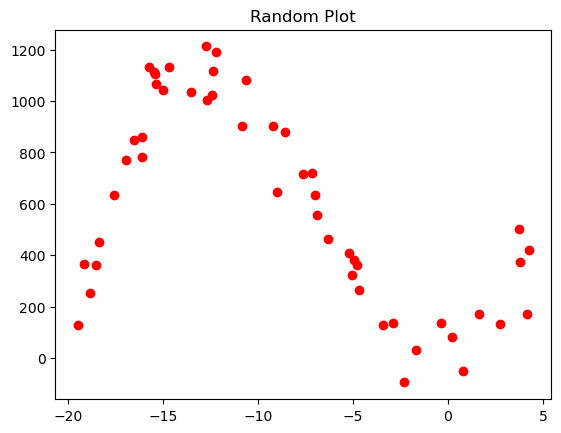

[array([1381.82807401]), array([1521.23341414]), array([53.99971532]), array([35.93653122]), array([53.47860115]), array([57.55047608]), array([23.60732664]), array([15.12463651])]


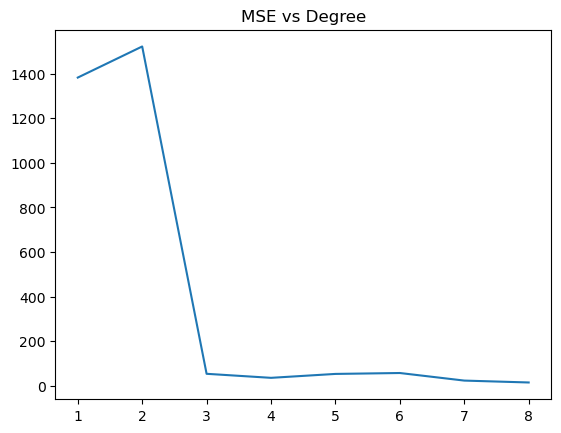

In [3]:
np.random.seed(42)
X, Y = random_plot(100, 50)

Part 2

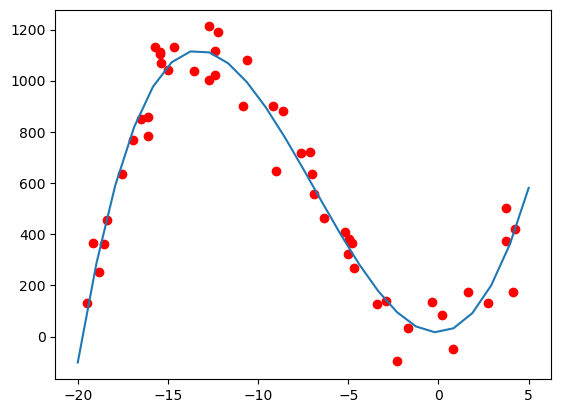

          4          3         2
-0.00557 x + 0.7996 x + 18.08 x + 3.146 x + 16.69


In [4]:
# Using polyfit func with 4 degrees
p = np.poly1d(np.polyfit(X, Y, 4))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X, Y, 'ro', t, p(t), '-')
plt.show()
print(p)

Part 3

In [269]:
np.random.seed(42)

#create objective function to follow a degree 4 polynomial
def objective_function(t, x):
    return t[0]*(x)**4 + t[1]*(x)**3 + t[2]*(x)**2 + t[3]*x + t[4]

#Fitness function
def fit(pop, x, Y):
    fitness = np.zeros((100,))
    y = np.zeros((100, len(x)))
    for i in range(len(fitness)):
        for k in range(len(x)):
            y[i,k] = objective_function(pop[i], x[k])
            fitness[i] -= (y[i,k]-Y[k])**2
    return fitness

#Parent Selection
def mate_selection(pop, fitness, num_parents):
    parents = np.zeros((num_parents, len(pop[0])))
    for num in range(num_parents):
        ind = np.argpartition(fitness, -55)[-55:]
        parents[num, :] = pop[ind[num], :]
    return parents

#Crossover function
def cross(parents, crossover, offspring_size):
    offspring = np.zeros((45,5))
    pt = np.random.randint(1, len(parents)-2)
    for i in range(offspring_size[0]):
        offspring[i, 0:pt] = parents[i, 0:pt]
        offspring[i, pt:] = parents[i+1, pt:]
    return offspring

#Mutation
def mutation(offspring, m_rate):
    for i in range(len(offspring)):
        if np.random.rand() < m_rate:
            val = np.random.randint(0,4)
            m = np.random.uniform(-1, 1, 1)
            offspring[i,val] = offspring[i,val] + m
    return offspring

In [270]:
#create random coefficients for the population for the algorithm
pop = np.random.normal(0, 1/5, size = (100, 5))
x = np.linspace(-20, 5, 25)
crossover = 0.9 # (100 * 0.9)/2 = 45 offspring
m_rate = 0.01
generations = 500
num_parents = 55 # 100 - 45 = 55 parents, need to have each generation at n=100

for generation in range(generations):
    fitness = fit(pop, x, Y)
    
    parents = mate_selection(pop, fitness, num_parents)
    
    offspring_cross = cross(parents, crossover, offspring_size=(pop.shape[0]- parents.shape[0], len(pop[0])))
    
    offspring_mut = mutation(offspring_cross, m_rate)
    
    pop = np.concatenate((parents, offspring_mut))

In [271]:
ind = np.where(fitness == np.max(fitness))
best_ind = np.min(ind)
best_weights = pop[best_ind]
best = objective_function(best_weights, x)
fitness[best_ind]

-11915529.159603102

The fitness function is still outputting very large negative values, meaning that this algorithm is far from converging. The error is still very large and might need more generations or a different initialization strategy.

Polyfit Function:            4          3         2
-0.00557 x + 0.7996 x + 18.08 x + 3.146 x + 16.69


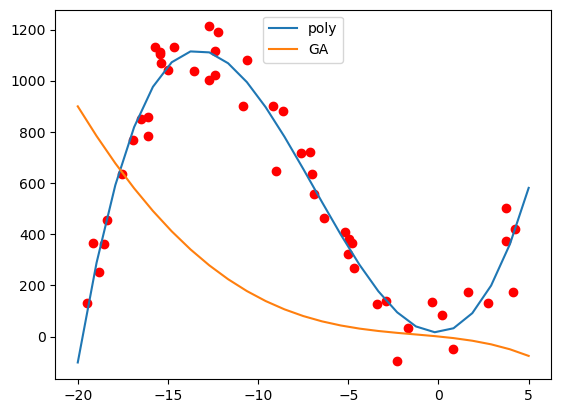

GA function: -0.002x^4 + -0.179x^3 + -0.704x^2 + -6.875x + 0.195


In [312]:
# Using polyfit func with 4 degrees
p = np.poly1d(np.polyfit(X, Y, 4))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X, Y, 'ro')
poly = plt.plot(t, p(t), '-', label = "poly")
print("Polyfit Function: ", p)

# Plotting our polynomial function
GA = plt.plot(x, best, '-', label = "GA")
plt.legend(loc='upper center')
plt.show()
print(f"GA function: {best_weights[0].round(3)}x^4 + {best_weights[1].round(3)}x^3 + {best_weights[2].round(3)}x^2 + {best_weights[3].round(3)}x + {best_weights[4].round(3)}")

As seen in the plot above, the genetic algorithm performs poorly when compared to the polyfit function. The issues that I am having with the GA is the initialization of the weights. I'm not sure whether or not I should be making the range similar to that of the weights from the polyfit function, or if I should start with a smaller range for initialization. After a lot of trial and error, and using differeint initialization methods, I decided to use a normal distribution to initialize my weights. The normal distribution has a mean = 0 and a standard deviation of 1/sqrt(inputs) which is 1/5. These weights start out pretty small, which makes it difficult to get large coefficients that will fit the data. Hypothetically if I were to use a larger standard deviation (1, 3, or 5) I might be able to get some larger weights that can match the polyfit polynomiald better than if I use the LeCun initialization. This is a GA so maybe LeCun isn't the most appropriate initialization technique to apply, but it felt better than guessing on the range of a random sample of a uniform distribution.

In [289]:
# Gaussian Distribution, mean=0 & stdev = 1
pop1 = np.random.normal(0, 1, size = (100, 5))
x = np.linspace(-20, 5, 25)
crossover = 0.9 # (100 * 0.9)/2 = 45 offspring
m_rate = 0.01
generations = 500
num_parents = 55 # 100 - 45 = 55 parents, need to have each generation at n=100

for generation in range(generations):
    fitness1 = fit(pop1, x, Y)
    
    parents1 = mate_selection(pop1, fitness1, num_parents)
    
    offspring_cross1 = cross(parents1, crossover, offspring_size=(pop1.shape[0]- parents.shape[0], len(pop1[0])))
    
    offspring_mut1 = mutation(offspring_cross1, m_rate)
    
    pop1 = np.concatenate((parents1, offspring_mut1))

In [290]:
ind1 = np.where(fitness1 == np.max(fitness1))
best_ind1 = np.min(ind1)
best_weights1 = pop1[best_ind]
best1 = objective_function(best_weights1, x)
fitness[best_ind1]

-11915529.159603102

Polyfit Function:            4          3         2
-0.00557 x + 0.7996 x + 18.08 x + 3.146 x + 16.69


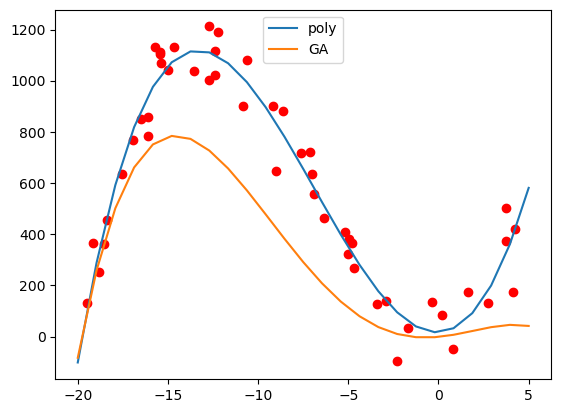

Second GA Function: -0.038x^4 + -0.555x^3 + 4.06x^2 + 6.83x + -1.386


In [310]:
# Using polyfit func with 4 degrees
p = np.poly1d(np.polyfit(X, Y, 4))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X, Y, 'ro')
poly = plt.plot(t, p(t), '-', label = "poly")
print("Polyfit Function: ", p)

# Plotting our polynomial function
GA = plt.plot(x, best1, '-', label = "GA")
plt.legend(loc='upper center')
plt.show()
print(f"Second GA Function: {best_weights1[0].round(3)}x^4 + {best_weights1[1].round(3)}x^3 + {best_weights1[2].round(3)}x^2 + {best_weights1[3].round(3)}x + {best_weights1[4].round(3)}")

Here we can see that a Gaussian Distribution has a much better fitting polynomial with the weights from that distribution. This is the best looking of the 3 distributions I used to initialize the populations. This distribution might make the most sense in this context, simply just generating data in order to fit a plot of noisy data.

In [295]:
# Normal Distribution, mean=0 & stdev = 3
pop2 = np.random.normal(0, 3, size = (100, 5))
x = np.linspace(-20, 5, 25)
crossover = 0.9 # (100 * 0.9)/2 = 45 offspring
m_rate = 0.01
generations = 500
num_parents = 55 # 100 - 45 = 55 parents, need to have each generation at n=100

for generation in range(generations):
    fitness2 = fit(pop2, x, Y)
    
    parents2 = mate_selection(pop2, fitness2, num_parents)
    
    offspring_cross2 = cross(parents2, crossover, offspring_size=(pop2.shape[0]- parents.shape[0], len(pop2[0])))
    
    offspring_mut2 = mutation(offspring_cross2, m_rate)
    
    pop2 = np.concatenate((parents2, offspring_mut2))

In [296]:
ind2 = np.where(fitness == np.max(fitness))
best_ind2 = np.min(ind2)
best_weights2 = pop2[best_ind]
best2 = objective_function(best_weights2, x)
fitness[best_ind2]

-11915529.159603102

Polyfit Function:            4          3         2
-0.00557 x + 0.7996 x + 18.08 x + 3.146 x + 16.69


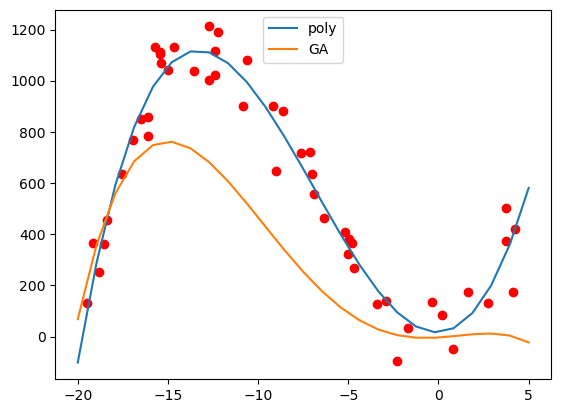

Third GA Function: -0.037x^4 + -0.642x^3 + 2.452x^2 + 4.562x + -3.771


In [313]:
# Using polyfit func with 4 degrees
p = np.poly1d(np.polyfit(X, Y, 4))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X, Y, 'ro')
poly = plt.plot(t, p(t), '-', label = "poly")
print("Polyfit Function: ", p)

# Plotting our polynomial function
GA = plt.plot(x, best2, '-', label = "GA")
plt.legend(loc='upper center')
plt.show()
print(f"Third GA Function: {best_weights2[0].round(3)}x^4 + {best_weights2[1].round(3)}x^3 + {best_weights2[2].round(3)}x^2 + {best_weights2[3].round(3)}x + {best_weights2[4].round(3)}")

There is actually quite a similar plot here in comparison to the Gaussian Distribution. It looks like it doesn't fit the noisy data quite as well, but interesting that it wouldn't have larger values considering the change in stdev from 1 to 3. I thought that it would actually fit the data better having a larger variation of inputs.